In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import csv
import seaborn as sns

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
FILE_PATH="/content/drive/MyDrive/Colab Notebooks/ssafy_pjt2"

In [4]:
os.chdir(FILE_PATH)

In [5]:
!apt -qq -y install fonts-nanum > /dev/null
fontpath='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()
%config InlineBackend.figure_format = 'retina'
plt.rc('font', family="NanumBarunGothic")

In [6]:
data_file = pd.read_csv("food_nutrition_DB_for_mapred.txt", names=["NUM", "탄수화물(g)(1회제공량당)", "단백질(g)(1회제공량당)", "지방(g)(1회제공량당)"], encoding='utf8')

In [7]:
len(data_file)

80888

In [8]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80888 entries, 0 to 80887
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NUM              80888 non-null  int64  
 1   탄수화물(g)(1회제공량당)  80888 non-null  float64
 2   단백질(g)(1회제공량당)   80888 non-null  float64
 3   지방(g)(1회제공량당)    80888 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 2.5 MB


In [29]:
data_file.describe()

,NUM,탄수화물(g)(1회제공량당),단백질(g)(1회제공량당),지방(g)(1회제공량당)
count,80888.000000,80888.000000,80888.000000,80888.000000
mean,49605.542985,37.438712,6.943414,10.869090
std,24017.258813,170.327246,14.387422,109.417397
min,1.000000,0.000000,0.000000,0.000000
25%,29344.750000,11.000000,1.000000,0.500000
50%,50080.500000,25.000000,4.000000,4.000000
75%,70341.250000,50.000000,9.000000,12.920000
max,90608.000000,26666.000000,1750.000000,26374.000000


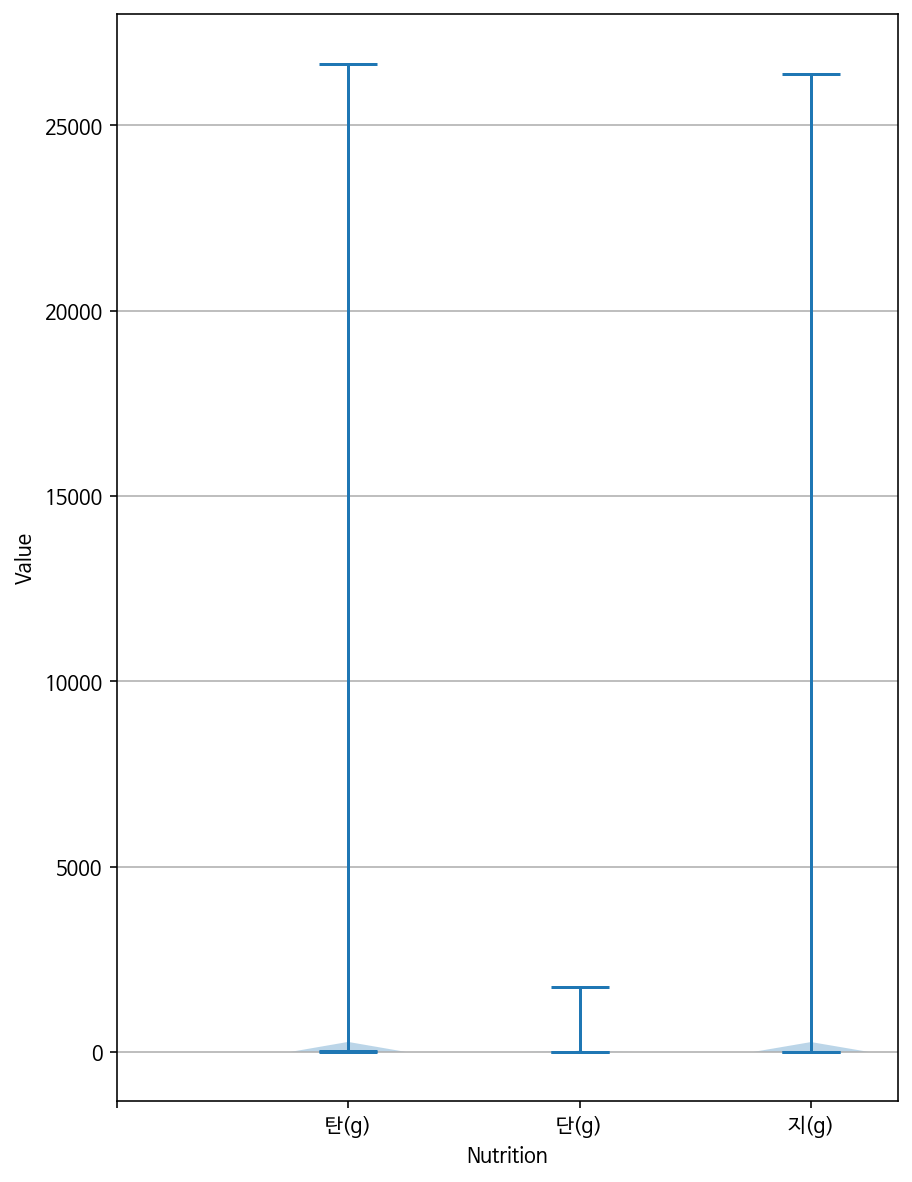

In [25]:
plt.figure(figsize=(7, 10))
plt.violinplot([data_file['탄수화물(g)(1회제공량당)'], data_file['단백질(g)(1회제공량당)'], data_file['지방(g)(1회제공량당)']], positions=[1, 2, 3], showmeans=True) 
tickvalues = range(0, 4)
plt.xticks(ticks= tickvalues,labels=['', '탄(g)', '단(g)', '지(g)'])
plt.xlabel("Nutrition")
plt.ylabel('Value')
plt.grid(True, axis='y')
plt.savefig("식품영양DB_nutrition_range_total.png")
plt.show()

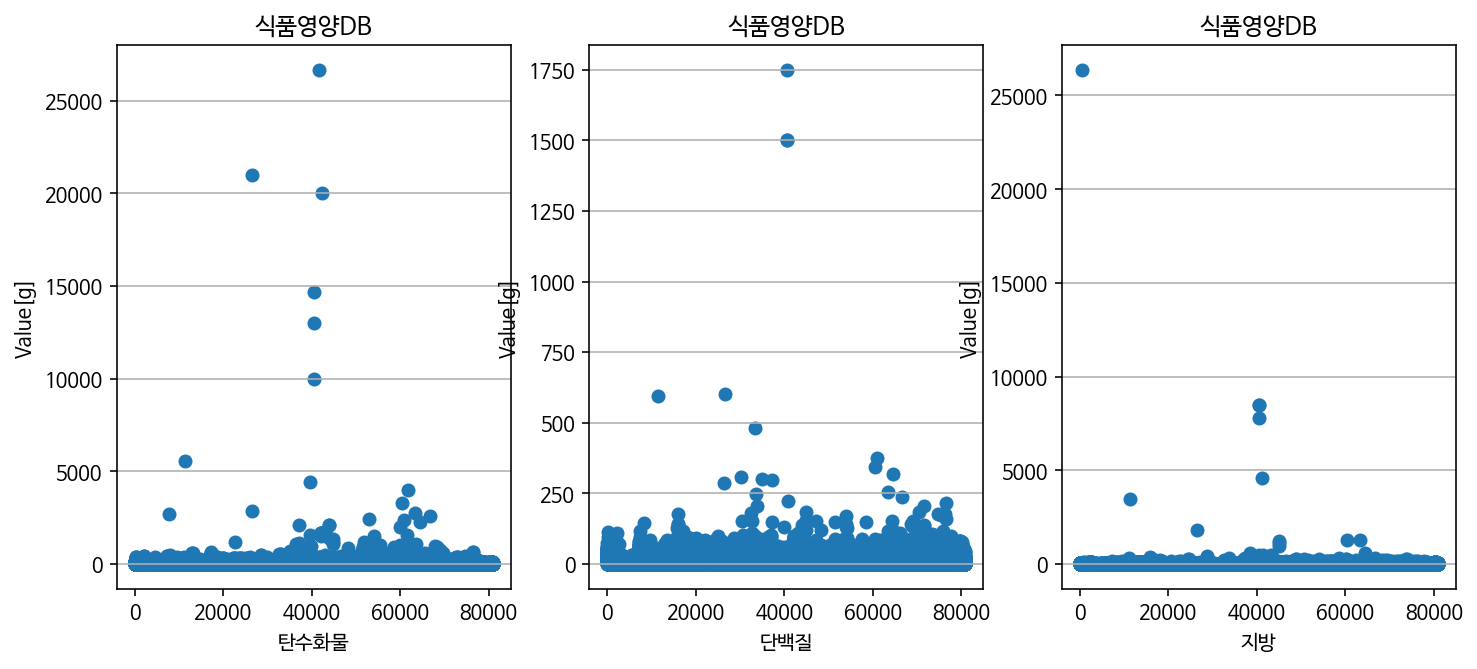

In [26]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.scatter(range(0, len(data_file)), data_file['탄수화물(g)(1회제공량당)']) 
plt.xlabel("탄수화물")
plt.ylabel('Value[g]')
plt.grid(True, axis='y')
plt.title("식품영양DB")

plt.subplot(1, 3, 2)
plt.scatter(range(0, len(data_file)), data_file['단백질(g)(1회제공량당)']) 
plt.xlabel("단백질")
plt.ylabel('Value[g]')
plt.grid(True, axis='y')
plt.title("식품영양DB")

plt.subplot(1, 3, 3)
plt.scatter(range(0, len(data_file)), data_file['지방(g)(1회제공량당)']) 
plt.xlabel("지방")
plt.ylabel('Value[g]')
plt.grid(True, axis='y')
plt.title("식품영양DB")

plt.savefig("식품영양DB_nutrition_range_total_scatter.png")
plt.show()

In [27]:
carbon_less_3000 = []
for data in data_file['탄수화물(g)(1회제공량당)']:
    if data < 3000:
        carbon_less_3000.append(data)

protein_less_250 = []
for data in data_file['단백질(g)(1회제공량당)']:
    if data < 250:
        protein_less_250.append(data)

fat_less_1000 = []
for data in data_file['지방(g)(1회제공량당)']:
    if data < 1000:
        fat_less_1000.append(data)

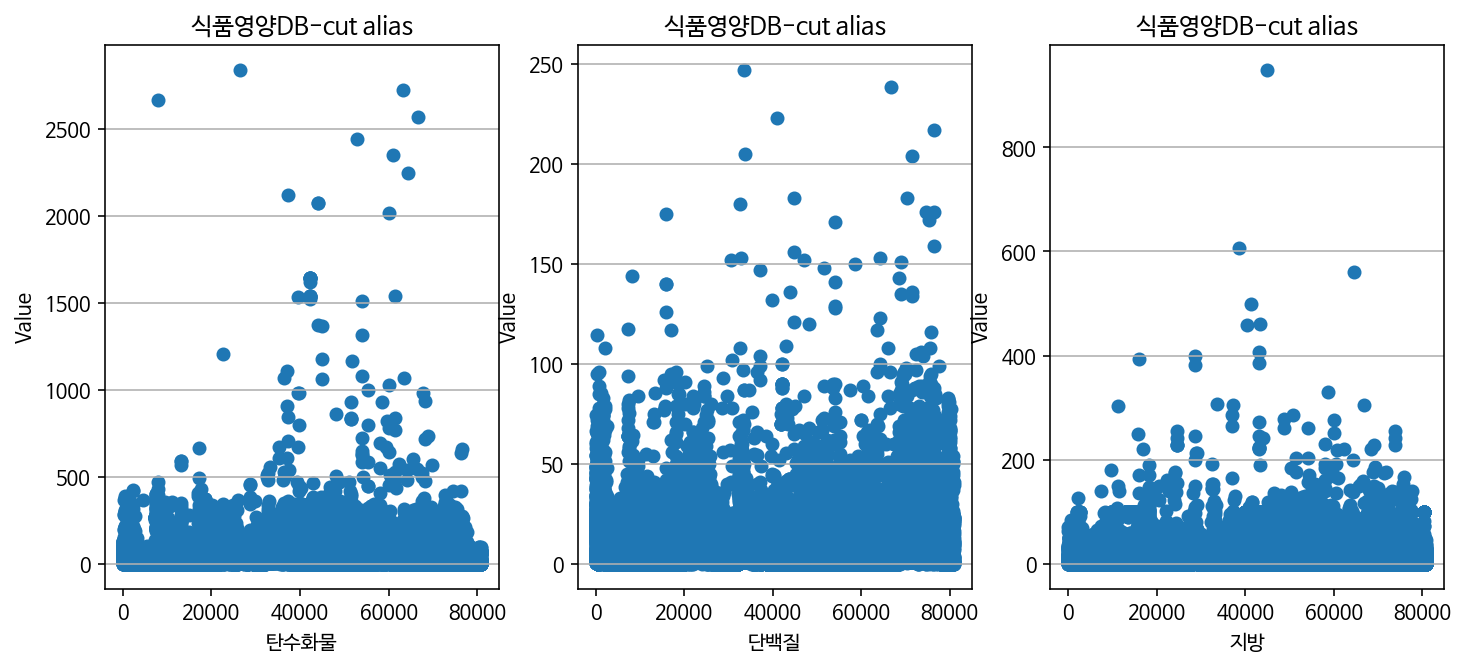

In [28]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.scatter(range(0, len(carbon_less_3000)), carbon_less_3000) 
plt.xlabel("탄수화물")
plt.ylabel('Value')
plt.grid(True, axis='y')
plt.title("식품영양DB-cut alias")

plt.subplot(1, 3, 2)
plt.scatter(range(0, len(protein_less_250)), protein_less_250) 
plt.xlabel("단백질")
plt.ylabel('Value')
plt.grid(True, axis='y')
plt.title("식품영양DB-cut alias")

plt.subplot(1, 3, 3)
plt.scatter(range(0, len(fat_less_1000)), fat_less_1000) 
plt.xlabel("지방")
plt.ylabel('Value')
plt.grid(True, axis='y')
plt.title("식품영양DB-cut alias")

plt.savefig("식품영양DB_nutrition_range_remove_alias.png")
plt.show()

In [35]:
print("  max min avg")
print("탄", max(carbon_less_3000), min(carbon_less_3000), sum(carbon_less_3000) / len(carbon_less_3000))
print("단", max(protein_less_250), min(protein_less_250), sum(protein_less_250) / len(protein_less_250))
print("지", max(fat_less_1000), min(fat_less_1000), sum(fat_less_1000) / len(fat_less_1000))

  max min avg
탄 2838.0 0.0 35.92783637083022
단 247.0 0.0 6.834449637708119
지 949.0 0.0 10.056620794539715
